In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\vyshn\Downloads\userbehaviour.csv')

In [3]:
df.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed


In [4]:
df['Average Screen Time'].describe()

count    999.000000
mean      24.390390
std       14.235415
min        0.000000
25%       12.000000
50%       24.000000
75%       36.000000
max       50.000000
Name: Average Screen Time, dtype: float64

In [5]:
df['Average Spent on App (INR)'].describe()

count    999.000000
mean     424.415415
std      312.365695
min        0.000000
25%       96.000000
50%      394.000000
75%      717.500000
max      998.000000
Name: Average Spent on App (INR), dtype: float64

<Axes: xlabel='Average Screen Time', ylabel='Average Spent on App (INR)'>

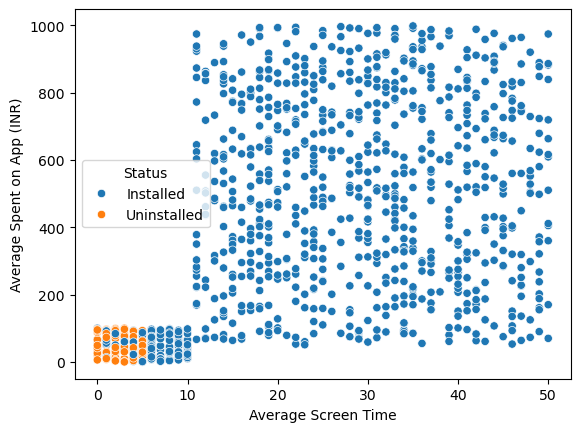

In [6]:
sns.scatterplot(df, x='Average Screen Time', y= 'Average Spent on App (INR)', hue='Status')

<Axes: xlabel='Average Spent on App (INR)', ylabel='Ratings'>

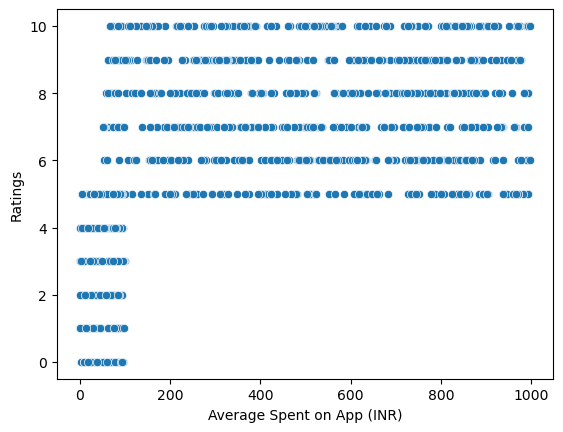

In [7]:
sns.scatterplot(df, x='Average Spent on App (INR)', y='Ratings')

<Axes: xlabel='Average Screen Time', ylabel='Ratings'>

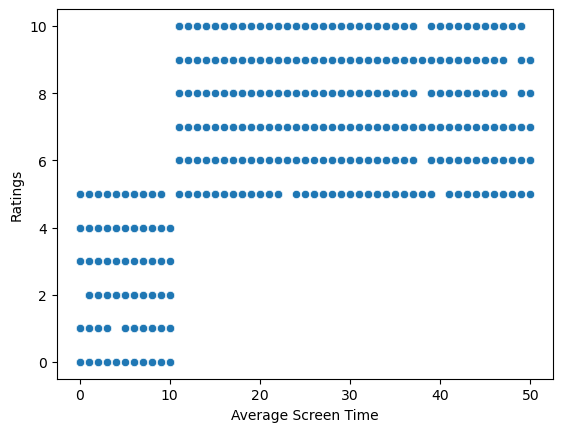

In [8]:
sns.scatterplot(df, x='Average Screen Time', y='Ratings')

In [9]:
df['Status'].value_counts()

Status
Installed      916
Uninstalled     83
Name: count, dtype: int64

App User Segmentation to Find Retained and Lost Users


In [10]:
df.columns

Index(['userid', 'Average Screen Time', 'Average Spent on App (INR)',
       'Left Review', 'Ratings', 'New Password Request',
       'Last Visited Minutes', 'Status'],
      dtype='object')

In [11]:
clustering_data = df[['Average Screen Time', 'Average Spent on App (INR)', 'Left Review', 'Ratings',
                      'New Password Request', 'Last Visited Minutes']]

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
minmax = MinMaxScaler()

In [14]:
scaled_df = minmax.fit_transform(clustering_data)

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters=3)

In [17]:
clusters = kmeans.fit_predict(clustering_data)

C:\Users\vyshn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [18]:
df['Segment'] = clusters

In [19]:
df.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Segment
0,1001,17.0,634.0,1,9,7,2990,Installed,0
1,1002,0.0,54.0,0,4,8,24008,Uninstalled,2
2,1003,37.0,207.0,0,8,5,971,Installed,0
3,1004,32.0,445.0,1,6,2,799,Installed,0
4,1005,45.0,427.0,1,5,6,3668,Installed,0


In [20]:
df['Segment'].unique()

array([0, 2, 1])

In [21]:
df['Segment'] = df['Segment'].map({0: 'Retained', 1: 'Churn', 2:'Need Attention'})

In [22]:
df.head(10)

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Segment
0,1001,17.0,634.0,1,9,7,2990,Installed,Retained
1,1002,0.0,54.0,0,4,8,24008,Uninstalled,Need Attention
2,1003,37.0,207.0,0,8,5,971,Installed,Retained
3,1004,32.0,445.0,1,6,2,799,Installed,Retained
4,1005,45.0,427.0,1,5,6,3668,Installed,Retained
5,1006,28.0,599.0,0,9,4,2878,Installed,Retained
6,1007,49.0,887.0,1,9,6,4481,Installed,Retained
7,1008,8.0,31.0,0,2,1,1715,Installed,Retained
8,1009,28.0,741.0,1,8,2,801,Installed,Retained
9,1010,28.0,524.0,1,8,4,4621,Installed,Retained


In [24]:
df[df['Segment'] == 'Churn']

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Segment
38,1039,1.0,97.0,0,1,7,37959,Uninstalled,Churn
43,1044,4.0,93.0,0,2,8,49334,Uninstalled,Churn
46,1047,3.0,34.0,1,5,6,39016,Uninstalled,Churn
61,1062,5.0,67.0,0,2,6,30435,Uninstalled,Churn
64,1065,5.0,26.0,1,3,6,40868,Uninstalled,Churn
86,1087,1.0,94.0,1,5,5,42101,Uninstalled,Churn
93,1094,1.0,8.0,1,0,15,33465,Uninstalled,Churn
99,1100,3.0,75.0,1,4,12,41859,Uninstalled,Churn
146,1147,2.0,42.0,1,2,11,40603,Uninstalled,Churn
150,1151,1.0,95.0,1,2,10,31724,Uninstalled,Churn


In [26]:
df[df['Segment'] =='Need Attention']

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Segment
1,1002,0.0,54.0,0,4,8,24008,Uninstalled,Need Attention
68,1069,0.0,48.0,1,4,10,26405,Uninstalled,Need Attention
109,1110,0.0,23.0,0,1,15,22915,Uninstalled,Need Attention
114,1115,5.0,20.0,1,5,5,13331,Installed,Need Attention
122,1123,3.0,44.0,1,0,13,28046,Uninstalled,Need Attention
138,1139,1.0,13.0,0,2,2,12629,Installed,Need Attention
158,1159,3.0,83.0,0,0,8,25789,Uninstalled,Need Attention
173,1174,3.0,46.0,0,2,14,24048,Uninstalled,Need Attention
180,1181,3.0,100.0,0,3,7,29465,Uninstalled,Need Attention
198,1199,1.0,92.0,0,1,14,19379,Uninstalled,Need Attention


<Axes: xlabel='Last Visited Minutes', ylabel='Average Spent on App (INR)'>

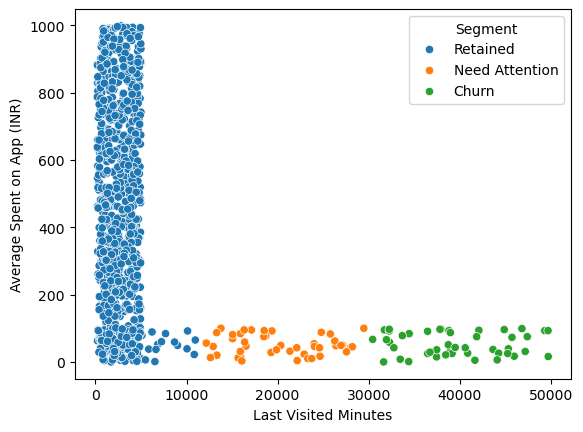

In [27]:
sns.scatterplot(df, x='Last Visited Minutes', y='Average Spent on App (INR)', hue='Segment')